In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# Importing libraries
import sys
from pprint import pprint
import pandas as pd
import os
import json
import numpy as np
import pandas

from pandas.errors import ParserError

# Limpeza dos dados

In [6]:
hits = pd.read_csv(r"../data/dataset/spotify_hits_dataset_complete.csv", error_bad_lines=False, sep='\t', encoding='utf-8')
hits.head()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_7940\4142976333.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  hits = pd.read_csv(r"../data/dataset/spotify_hits_dataset_complete.csv", error_bad_lines=False, sep='\t', encoding='utf-8')


,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,7offICpl9kla5kC61uUAs9,Bate Palma,"['5GqnSMX8p2hxqsM6LqDty3', '0jTDeBJQr3unrK29Lk...","['MC JottaPê', 'Lexa']",50,False,Collaboration,1,2,181,...,4,0.626,0.857,0.685,0.0,0.206,-4.840,0.3800,0.8370,150.052
1,1dLXLETYiZohIZWnse4ypG,Better,['5ZsFI1h6hIdQRw2ti0hz81'],['ZAYN'],68,False,Solo,1,1,183,...,4,0.353,0.637,0.418,0.0,0.131,-7.137,0.3010,0.0807,84.295
2,79Uf0vVa7HwWKSgdpTwtRm,Século 21,"['7KVJCU4z5L4EUHILL8aMxR', '4PzYKhC14sTJNEr0dz...","['Leo Santana', 'Luísa Sonza']",50,True,Collaboration,5,2,184,...,4,0.456,0.832,0.769,0.0,0.407,-7.023,0.0578,0.7240,132.972
3,3U4isOIWM3VvDubwSI3y7a,All of Me,['5y2Xq6xcjJb2jVM54GHK3t'],['John Legend'],88,False,Solo,6,1,184,...,4,0.922,0.422,0.264,0.0,0.132,-7.064,0.0322,0.3310,119.930
4,78kar2tZk7655xZMibzXO3,Oi,['5D56dZmhE9DgT01XixdHiD'],['Lagum'],63,False,Solo,4,1,184,...,4,0.296,0.807,0.560,0.0,0.101,-9.356,0.0459,0.7250,134.093


In [7]:
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join('../data/new_dataset', x)),
                        os.listdir('../data/new_dataset') ) )

In [8]:
path = '../data/new_dataset/regional-br-weekly-2019-01-03.csv'
chart = pd.read_csv(path, encoding='utf-8', delimiter='\t')
chart.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,ID
0,1,spotify:track:5EKHbW7mXcAR4hCyS3YXjb,"Felipe Araújo, Ferrugem",Atrasadinha - Live,Universal Music Ltda.,1,1,15,5517626,5EKHbW7mXcAR4hCyS3YXjb
1,2,spotify:track:3Hb9kUdm4yf839Fle4RIdT,"MC L da Vinte, MC Gury",Parado no Bailão,Funk Explode,1,4,14,4439458,3Hb9kUdm4yf839Fle4RIdT
2,3,spotify:track:2qkNnJvQvhLiZ63X1L3eFz,Zé Neto & Cristiano,Notificação Preferida - Ao Vivo,Som Livre,2,2,29,4345439,2qkNnJvQvhLiZ63X1L3eFz
3,4,spotify:track:2H1liABu20HXBOmbt5SQz1,Marília Mendonça,Ciumeira - Ao Vivo,Som Livre,1,3,19,4161551,2H1liABu20HXBOmbt5SQz1
4,5,spotify:track:2lAyctg5FocS67eksHoyIg,"Márcia Fellipe, Jerry Smith",Quem Me Dera,Universal Music Ltda.,4,5,11,3989150,2lAyctg5FocS67eksHoyIg


In [9]:
danceability_values = []
valence_values = []
energy_values = []
tempo_values = []
dates = []

In [10]:
danceability_median = []
valence_median = []
energy_median = []
tempo_median = []


In [11]:
directory = '../data/new_dataset'
for filename in list_of_files:
    if filename.endswith(".csv"):
        danceability_week = []
        valence_week = []
        energy_week = []
        tempo_week = []
        path = directory + '/' + filename
        chart = pd.read_csv(path, encoding='utf-8', delimiter='\t')
        for i in chart['ID']:
            for idx, song_id in enumerate(hits['song_id']):
                if i == song_id:
                    danceability_week.append(hits.loc[idx, 'danceability'])
                    valence_week.append(hits.loc[idx, 'valence'])
                    energy_week.append(hits.loc[idx, 'energy'])
                    tempo_week.append(hits.loc[idx, 'tempo'])
                    
        dates.append(filename[19:29])
        
        danceability_values.append(np.mean(danceability_week))
        valence_values.append(np.mean(valence_week))
        energy_values.append(np.mean(energy_week))
        tempo_values.append(np.mean(tempo_week))
        
        danceability_median.append(np.median(danceability_week))
        valence_median.append(np.median(valence_week))
        energy_median.append(np.median(energy_week))
        tempo_median.append(np.median(tempo_week))

In [18]:
dates = pd.to_datetime(dates)

In [19]:
from datetime import datetime

In [20]:
dates[0].strftime('%Y-%m-%dT%H:%M:%S.%f%z')

new_dates = []

for date in dates:
    new_dates.append(date.strftime('%Y-%m-%dT%H:%M:%S.%f%z'))

In [21]:
new_dates

['2019-01-03T00:00:00.000000',
 '2019-01-10T00:00:00.000000',
 '2019-01-17T00:00:00.000000',
 '2019-01-24T00:00:00.000000',
 '2019-01-31T00:00:00.000000',
 '2019-02-07T00:00:00.000000',
 '2019-02-14T00:00:00.000000',
 '2019-02-21T00:00:00.000000',
 '2019-02-28T00:00:00.000000',
 '2019-03-07T00:00:00.000000',
 '2019-03-14T00:00:00.000000',
 '2019-03-21T00:00:00.000000',
 '2019-03-28T00:00:00.000000',
 '2019-04-04T00:00:00.000000',
 '2019-04-11T00:00:00.000000',
 '2019-04-18T00:00:00.000000',
 '2019-04-25T00:00:00.000000',
 '2019-05-02T00:00:00.000000',
 '2019-05-09T00:00:00.000000',
 '2019-05-16T00:00:00.000000',
 '2019-05-23T00:00:00.000000',
 '2019-05-30T00:00:00.000000',
 '2019-06-06T00:00:00.000000',
 '2019-06-13T00:00:00.000000',
 '2019-06-20T00:00:00.000000',
 '2019-06-27T00:00:00.000000',
 '2019-07-04T00:00:00.000000',
 '2019-07-11T00:00:00.000000',
 '2019-07-18T00:00:00.000000',
 '2019-07-25T00:00:00.000000',
 '2019-08-01T00:00:00.000000',
 '2019-08-08T00:00:00.000000',
 '2019-0

In [22]:
dates = pd.DataFrame({ 'dates': new_dates})
dates.to_csv('../data/dates.csv')

In [18]:
df = pd.DataFrame(list(zip(new_dates, danceability_values, valence_values, energy_values, tempo_values)), 
                     columns=['Data', 'Danceability', 'Valence', 'Energy', 'Tempo'])
df.head(20)

,Data,Danceability,Valence,Energy,Tempo
0,2019-01-03,0.693975,0.619117,0.695050,129.353865
1,2019-01-10,0.691040,0.607005,0.685995,128.320995
2,2019-01-17,0.690205,0.600952,0.693635,128.236365
3,2019-01-24,0.688690,0.602417,0.694285,128.143540
4,2019-01-31,0.687465,0.602035,0.692455,129.476740
5,2019-02-07,0.692845,0.612601,0.690765,127.892345
6,2019-02-14,0.688410,0.593502,0.682115,127.062035
7,2019-02-21,0.689760,0.595087,0.682900,127.147640
8,2019-02-28,0.688440,0.609506,0.695270,128.674555
9,2019-03-07,0.700015,0.626962,0.696375,128.936665


In [30]:
danceability = pd.DataFrame(list(zip(new_dates, danceability_values)), 
                     columns=['Data', 'Danceability'])
danceability.head(20)

,Data,Danceability
0,2019-01-03T00:00:00.000000,0.693975
1,2019-01-10T00:00:00.000000,0.691040
2,2019-01-17T00:00:00.000000,0.690205
3,2019-01-24T00:00:00.000000,0.688690
4,2019-01-31T00:00:00.000000,0.687465
5,2019-02-07T00:00:00.000000,0.692845
6,2019-02-14T00:00:00.000000,0.688410
7,2019-02-21T00:00:00.000000,0.689760
8,2019-02-28T00:00:00.000000,0.688440
9,2019-03-07T00:00:00.000000,0.700015


In [12]:
valence = pd.DataFrame({ 'valence': valence_values })
valence.head()


,valence
0,0.619117
1,0.607005
2,0.600952
3,0.602417
4,0.602035


In [13]:
valence.to_csv('../data/valence.csv')

In [15]:
energy = pd.DataFrame({ 'energy': energy_values })
energy.to_csv('../data/energy.csv')

In [22]:
print(dates)

DatetimeIndex(['2019-01-03', '2019-01-10', '2019-01-17', '2019-01-24',
               '2019-01-31', '2019-02-07', '2019-02-14', '2019-02-21',
               '2019-02-28', '2019-03-07',
               ...
               '2021-11-04', '2021-11-11', '2021-11-18', '2021-11-25',
               '2021-12-02', '2021-12-09', '2021-12-16', '2021-12-23',
               '2021-12-30', '2022-01-06'],
              dtype='datetime64[ns]', length=158, freq=None)


In [31]:
danceability.to_csv('../data/danceability.csv')

In [19]:
df.to_csv('../data/spotify_features.csv')

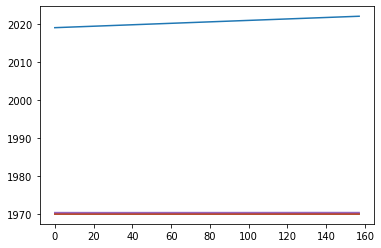

In [11]:
df['DanceabilityMedian'] = danceability_median
df['ValenceMedian'] = valence_median
df['EnergyMedian'] = energy_median
df['TempoMedian'] = tempo_median

Text(0, 0.5, 'Danceability')

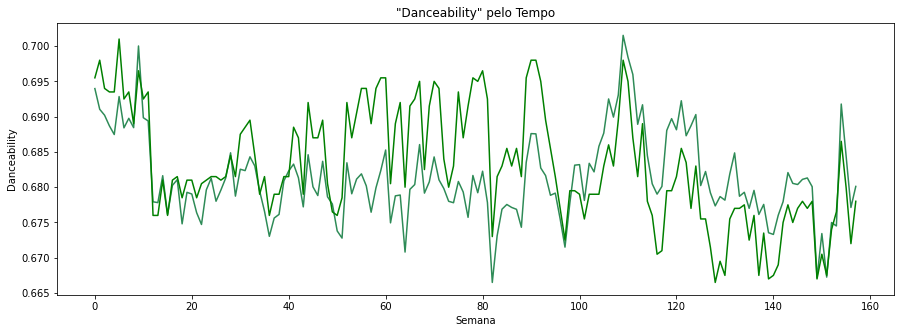

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Danceability'], color='#2E8B57')
plt.plot(df.index, df['DanceabilityMedian'], color='g')

plt.title('"Danceability" pelo Tempo')
plt.xlabel('Semana')
plt.ylabel('Danceability')

In [35]:
check_por_mes = df.groupby(pd.Grouper(key='Data', freq='M')).mean()

In [28]:
check_por_mes.head()

,Danceability,Valence,Energy,Tempo
Data,,,,
2019-01-31,0.690275,0.606305,0.692284,128.706301
2019-02-28,0.689864,0.602674,0.687763,127.694144
2019-03-31,0.689294,0.617765,0.688939,128.527846
2019-04-30,0.678959,0.607156,0.691611,127.984154
2019-05-31,0.678114,0.613328,0.686264,127.052141


Text(0, 0.5, 'Danceability')

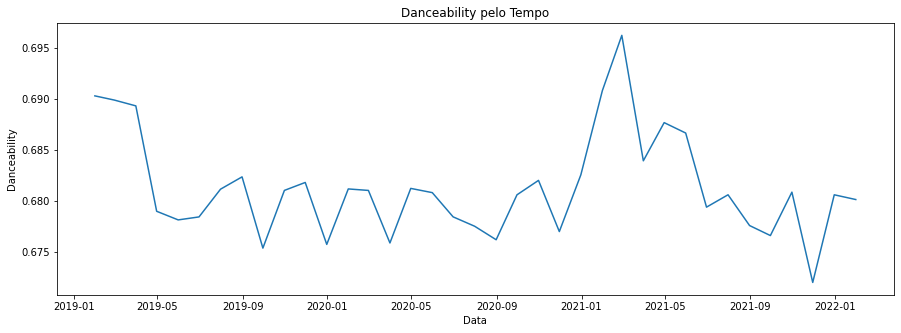

In [30]:
plt.figure(figsize=(15,5))
plt.plot(check_por_mes.index, check_por_mes['Danceability'])

plt.title('Dançabilidade pelo Tempo')
plt.xlabel('Data')
plt.ylabel('Dançabilidade')

In [44]:
check_por_ano = df.groupby(pd.Grouper(key='Data', freq='Y')).mean()
check_por_ano

,Danceability,Valence,Energy,Tempo,DanceabilityMedian,ValenceMedian,EnergyMedian,TempoMedian
Data,,,,,,,,
2019-12-31,0.681935,0.622819,0.690767,127.762947,0.684721,0.658212,0.716981,128.122115
2020-12-31,0.679640,0.636339,0.706310,128.682286,0.687349,0.654500,0.724943,128.695604
2021-12-31,0.682616,0.667776,0.706898,131.778467,0.677202,0.691115,0.730817,130.921558
2022-12-31,0.680110,0.672276,0.722448,132.853460,0.678000,0.688000,0.763000,130.041000


In [45]:
check_por_ano = df.groupby(pd.Grouper(key='Data', freq='Y')).median()
check_por_ano

,Danceability,Valence,Energy,Tempo,DanceabilityMedian,ValenceMedian,EnergyMedian,TempoMedian
Data,,,,,,,,
2019-12-31,0.680988,0.619761,0.692785,127.817575,0.6815,0.6565,0.71900,127.95750
2020-12-31,0.679690,0.634811,0.705990,128.757095,0.6890,0.6585,0.72250,128.66050
2021-12-31,0.680508,0.667926,0.709872,131.613993,0.6770,0.6940,0.73225,130.04275
2022-12-31,0.680110,0.672276,0.722448,132.853460,0.6780,0.6880,0.76300,130.04100


# Médias

## Danceability

Text(0, 0.5, 'Danceability')

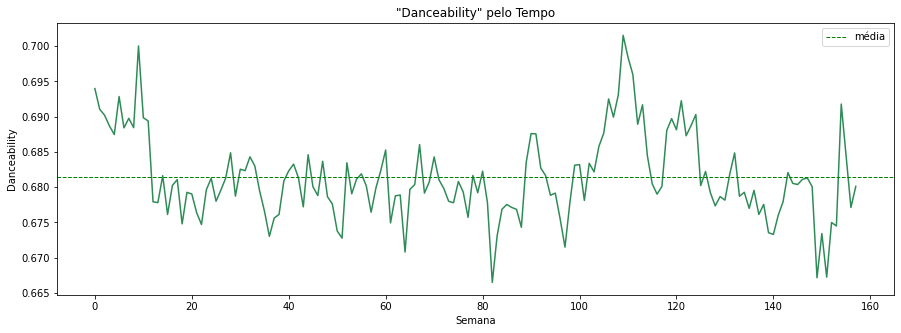

In [25]:
media = np.mean(danceability_values)

plt.figure(figsize=(15,5))
plt.plot(df.index, df['Danceability'], color='#2E8B57')
plt.plot()
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.xlabel('Semana')
plt.ylabel('Danceability')

Text(0, 0.5, 'Danceability')

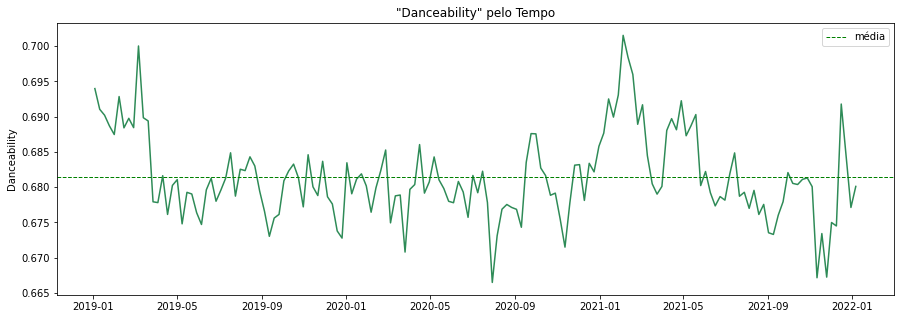

In [45]:
media = np.mean(danceability_values)

plt.figure(figsize=(15,5))
plt.plot(dates, df['Danceability'], color='#2E8B57')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

In [37]:
menor = np.argmin(danceability_values)
maior = np.argmax(danceability_values)
maior

109

In [31]:
dates[82]

Timestamp('2020-07-30 00:00:00')

In [38]:
dates[109]

Timestamp('2021-02-04 00:00:00')

Text(0, 0.5, 'Danceability')

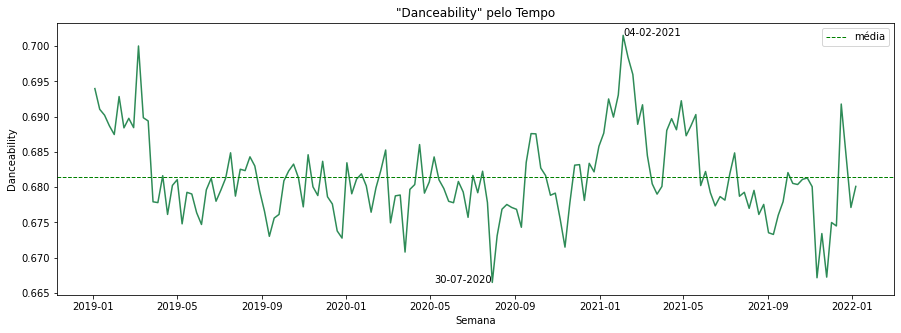

In [46]:
media = np.mean(danceability_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Danceability'], color='#2E8B57')

style = dict(size=10, color='black')
ax.text(dates[menor], danceability_values[menor], "30-07-2020", ha='right', **style)
ax.text(dates[maior], danceability_values[maior], "04-02-2021", ha='left', **style)
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.xlabel('Semana')
plt.ylabel('Danceability')

In [47]:
positions = []
for idx, x in enumerate(danceability_values):
    if x <= 0.673:
        positions.append(idx)
positions

[51, 64, 82, 97, 149, 151]

In [48]:

for idx, x in enumerate(danceability_values):
    if x >= 0.695:
        positions.append(idx)
positions

[51, 64, 82, 97, 149, 151, 9, 109, 110, 111]

In [16]:
datas = []
for x in positions:
    datas.append(dates[x])

print(datas)

[Timestamp('2019-12-26 00:00:00'), Timestamp('2020-03-26 00:00:00'), Timestamp('2020-07-30 00:00:00'), Timestamp('2020-11-12 00:00:00'), Timestamp('2021-11-11 00:00:00'), Timestamp('2021-11-25 00:00:00'), Timestamp('2019-03-07 00:00:00'), Timestamp('2021-02-04 00:00:00'), Timestamp('2021-02-11 00:00:00'), Timestamp('2021-02-18 00:00:00')]


In [217]:
n_paa_segments = 17
paa = PiecewiseAggregateApproximation(n_segments = n_paa_segments)
paa_dataset = paa.fit_transform([danceability_values])
paa_dataset_inv = paa.inverse_transform(paa_dataset)
paa_dataset_inv = np.reshape(paa_dataset_inv, (158))
paa_dataset_inv

/home/bruna/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([0.69009222, 0.69009222, 0.69009222, 0.69009222, 0.69009222,
       0.69009222, 0.69009222, 0.69009222, 0.69009222, 0.68378722,
       0.68378722, 0.68378722, 0.68378722, 0.68378722, 0.68378722,
       0.68378722, 0.68378722, 0.68378722, 0.67807889, 0.67807889,
       0.67807889, 0.67807889, 0.67807889, 0.67807889, 0.67807889,
       0.67807889, 0.67807889, 0.68146278, 0.68146278, 0.68146278,
       0.68146278, 0.68146278, 0.68146278, 0.68146278, 0.68146278,
       0.68146278, 0.67938167, 0.67938167, 0.67938167, 0.67938167,
       0.67938167, 0.67938167, 0.67938167, 0.67938167, 0.67938167,
       0.67865667, 0.67865667, 0.67865667, 0.67865667, 0.67865667,
       0.67865667, 0.67865667, 0.67865667, 0.67865667, 0.68010611,
       0.68010611, 0.68010611, 0.68010611, 0.68010611, 0.68010611,
       0.68010611, 0.68010611, 0.68010611, 0.68011611, 0.68011611,
       0.68011611, 0.68011611, 0.68011611, 0.68011611, 0.68011611,
       0.68011611, 0.68011611, 0.67940034, 0.67940034, 0.67940

In [218]:
for x in range(len(paa_dataset_inv)):
    if paa_dataset_inv[x] == 0.:
        paa_dataset_inv[x] = 0.67625111

Text(0, 0.5, 'Danceability')

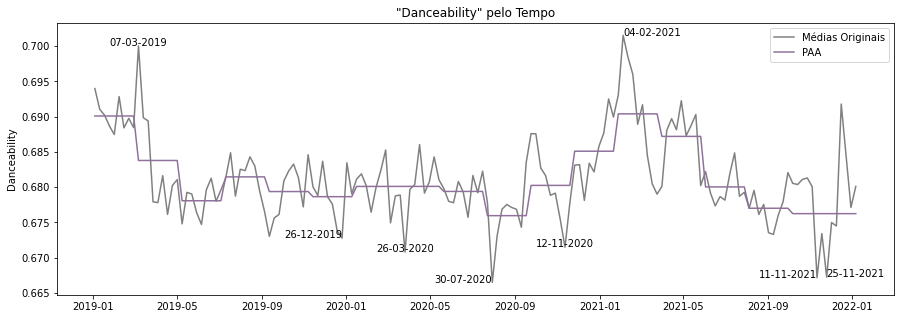

In [219]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Danceability'], color='grey', label= 'Médias Originais')
plt.plot(dates, paa_dataset_inv, color='#8F719B', label='PAA')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], danceability_values[positions[0]], "26-12-2019", ha='right', **style)
ax.text(dates[positions[1]], danceability_values[positions[1]], "26-03-2020", ha='center', **style)
ax.text(dates[positions[2]], danceability_values[positions[2]], "30-07-2020", ha='right', **style)
ax.text(dates[positions[3]], danceability_values[positions[3]], "12-11-2020", ha='center', **style)
ax.text(dates[positions[4]], danceability_values[positions[4]], "11-11-2021", ha='right', **style)
ax.text(dates[positions[5]], danceability_values[positions[5]], "25-11-2021", ha='left', **style)
ax.text(dates[positions[6]], danceability_values[positions[6]], "07-03-2019", ha='center', **style)
ax.text(dates[positions[7]], danceability_values[positions[7]], "04-02-2021", ha='left', **style)


plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

In [12]:
for idx, x in enumerate(dates):
    print(idx, x)

0 2019-01-03 00:00:00
1 2019-01-10 00:00:00
2 2019-01-17 00:00:00
3 2019-01-24 00:00:00
4 2019-01-31 00:00:00
5 2019-02-07 00:00:00
6 2019-02-14 00:00:00
7 2019-02-21 00:00:00
8 2019-02-28 00:00:00
9 2019-03-07 00:00:00
10 2019-03-14 00:00:00
11 2019-03-21 00:00:00
12 2019-03-28 00:00:00
13 2019-04-04 00:00:00
14 2019-04-11 00:00:00
15 2019-04-18 00:00:00
16 2019-04-25 00:00:00
17 2019-05-02 00:00:00
18 2019-05-09 00:00:00
19 2019-05-16 00:00:00
20 2019-05-23 00:00:00
21 2019-05-30 00:00:00
22 2019-06-06 00:00:00
23 2019-06-13 00:00:00
24 2019-06-20 00:00:00
25 2019-06-27 00:00:00
26 2019-07-04 00:00:00
27 2019-07-11 00:00:00
28 2019-07-18 00:00:00
29 2019-07-25 00:00:00
30 2019-08-01 00:00:00
31 2019-08-08 00:00:00
32 2019-08-15 00:00:00
33 2019-08-22 00:00:00
34 2019-08-29 00:00:00
35 2019-09-05 00:00:00
36 2019-09-12 00:00:00
37 2019-09-19 00:00:00
38 2019-09-26 00:00:00
39 2019-10-03 00:00:00
40 2019-10-10 00:00:00
41 2019-10-17 00:00:00
42 2019-10-24 00:00:00
43 2019-10-31 00:00:0

Text(0, 0.5, 'Danceability')

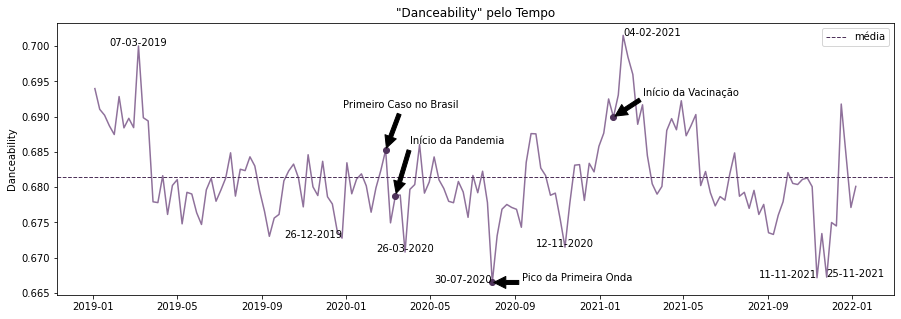

In [50]:
media = np.mean(danceability_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Danceability'], color='#8F719B')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], danceability_values[positions[0]], "26-12-2019", ha='right', **style)
ax.text(dates[positions[1]], danceability_values[positions[1]], "26-03-2020", ha='center', **style)
ax.text(dates[positions[2]], danceability_values[positions[2]], "30-07-2020", ha='right', **style)
ax.text(dates[positions[3]], danceability_values[positions[3]], "12-11-2020", ha='center', **style)
ax.text(dates[positions[4]], danceability_values[positions[4]], "11-11-2021", ha='right', **style)
ax.text(dates[positions[5]], danceability_values[positions[5]], "25-11-2021", ha='left', **style)
ax.text(dates[positions[6]], danceability_values[positions[6]], "07-03-2019", ha='center', **style)
ax.text(dates[positions[7]], danceability_values[positions[7]], "04-02-2021", ha='left', **style)

ax.plot(dates[60], danceability_values[60], 'o', color='#4F335B')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[60], danceability_values[60]), xycoords='data',
            xytext=(15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[62], danceability_values[62], 'o', color='#4F335B')
ax.annotate('Início da Pandemia',
            xy=(dates[62], danceability_values[62]), xycoords='data',
            xytext=(15, 60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[107], danceability_values[107], 'o', color='#4F335B')
ax.annotate('Início da Vacinação',
            xy=(dates[107], danceability_values[107]), xycoords='data',
            xytext=(30, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[82], danceability_values[82], 'o', color='#4F335B')
ax.annotate('Pico da Primeira Onda',
            xy=(dates[82], danceability_values[82]), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

## Valence

Text(0, 0.5, 'Valence')

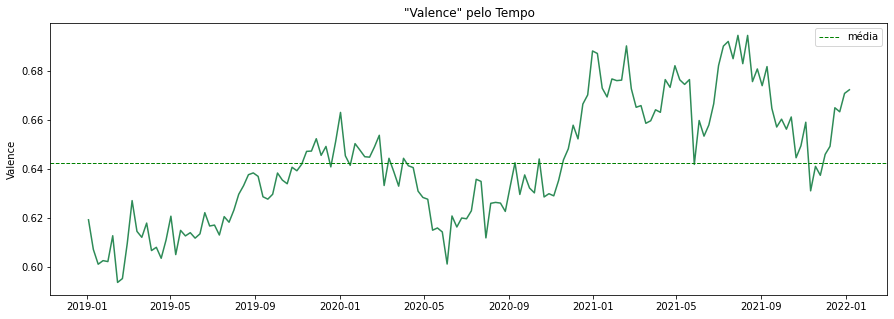

In [71]:
media = np.mean(valence_values)

plt.figure(figsize=(15,5))
plt.plot(dates, df['Valence'], color='#2E8B57')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Valence" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Valence')

In [27]:
positions_valence = []
for idx, x in enumerate(valence_values):
    if x < 0.605:
        positions_valence.append(idx)
    elif x > 0.68:
        positions_valence.append(idx)
print(positions_valence)

[2, 3, 4, 6, 7, 15, 18, 74, 104, 105, 111, 121, 130, 131, 132, 133, 134, 135, 136, 138, 140]


In [28]:
dates_valence = []
for x in positions_valence:
    dates_valence.append(dates[x])

In [206]:
n_paa_segments = 17
paa = PiecewiseAggregateApproximation(n_segments = n_paa_segments)
paa_dataset = paa.fit_transform([valence_values])
paa_dataset_inv = paa.inverse_transform(paa_dataset)
paa_dataset_inv = np.reshape(paa_dataset_inv, (158))
paa_dataset_inv

/home/bruna/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([0.60469117, 0.60469117, 0.60469117, 0.60469117, 0.60469117,
       0.60469117, 0.60469117, 0.60469117, 0.60469117, 0.61336361,
       0.61336361, 0.61336361, 0.61336361, 0.61336361, 0.61336361,
       0.61336361, 0.61336361, 0.61336361, 0.61406667, 0.61406667,
       0.61406667, 0.61406667, 0.61406667, 0.61406667, 0.61406667,
       0.61406667, 0.61406667, 0.62775639, 0.62775639, 0.62775639,
       0.62775639, 0.62775639, 0.62775639, 0.62775639, 0.62775639,
       0.62775639, 0.63496356, 0.63496356, 0.63496356, 0.63496356,
       0.63496356, 0.63496356, 0.63496356, 0.63496356, 0.63496356,
       0.64903467, 0.64903467, 0.64903467, 0.64903467, 0.64903467,
       0.64903467, 0.64903467, 0.64903467, 0.64903467, 0.64542589,
       0.64542589, 0.64542589, 0.64542589, 0.64542589, 0.64542589,
       0.64542589, 0.64542589, 0.64542589, 0.63322094, 0.63322094,
       0.63322094, 0.63322094, 0.63322094, 0.63322094, 0.63322094,
       0.63322094, 0.63322094, 0.61840558, 0.61840558, 0.61840

In [207]:
for x in range(len(paa_dataset_inv)):
    if paa_dataset_inv[x] == 0.:
        paa_dataset_inv[x] = 0.64724817

Text(0, 0.5, 'Valence')

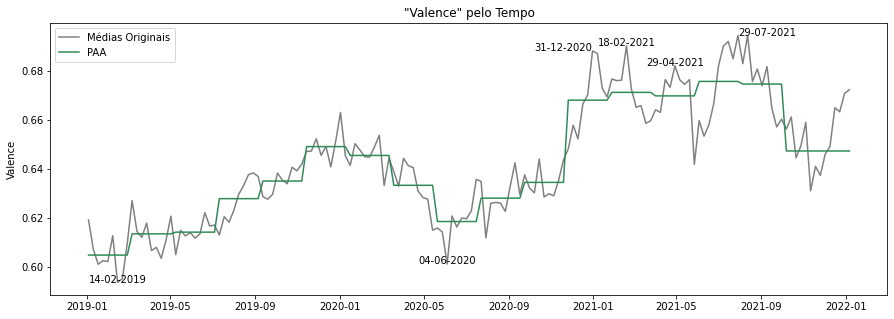

In [212]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Valence'], color='grey', label='Médias Originais')
plt.plot(dates, paa_dataset_inv, color='#2E8B57', label='PAA')

style = dict(size=10, color='black')

ax.text(dates[positions_valence[3]], valence_values[positions_valence[3]], "14-02-2019", ha='center', **style)
ax.text(dates[positions_valence[7]], valence_values[positions_valence[7]], "04-06-2020", ha='center', **style)
ax.text(dates[positions_valence[8]], valence_values[positions_valence[8]], "31-12-2020", ha='right', **style)
ax.text(dates[positions_valence[10]], valence_values[positions_valence[10]], "18-02-2021", ha='center', **style)
ax.text(dates[positions_valence[11]], valence_values[positions_valence[11]], "29-04-2021", ha='center', **style)
ax.text(dates[positions_valence[16]], valence_values[positions_valence[16]], "29-07-2021", ha='left', **style)

plt.title('"Valence" pelo Tempo')
plt.legend(loc="upper left")
plt.ylabel('Valence')

Text(0, 0.5, 'Valence')

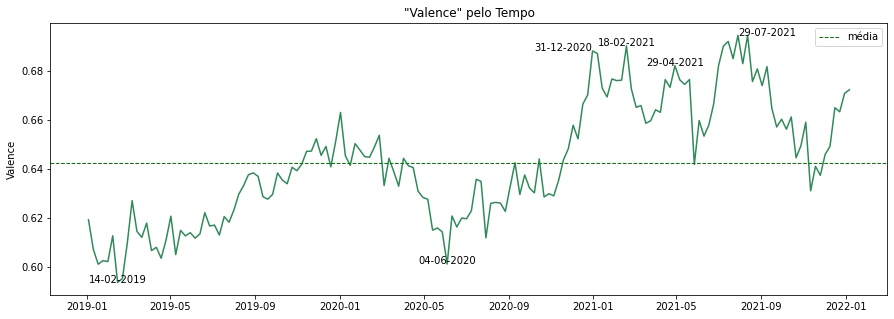

In [211]:
media = np.mean(valence_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Valence'], color='#2E8B57')

style = dict(size=10, color='black')

ax.text(dates[positions_valence[3]], valence_values[positions_valence[3]], "14-02-2019", ha='center', **style)
ax.text(dates[positions_valence[7]], valence_values[positions_valence[7]], "04-06-2020", ha='center', **style)
ax.text(dates[positions_valence[8]], valence_values[positions_valence[8]], "31-12-2020", ha='right', **style)
ax.text(dates[positions_valence[10]], valence_values[positions_valence[10]], "18-02-2021", ha='center', **style)
ax.text(dates[positions_valence[11]], valence_values[positions_valence[11]], "29-04-2021", ha='center', **style)
ax.text(dates[positions_valence[16]], valence_values[positions_valence[16]], "29-07-2021", ha='left', **style)


plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Valence" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Valence')


Text(0, 0.5, 'Valence')

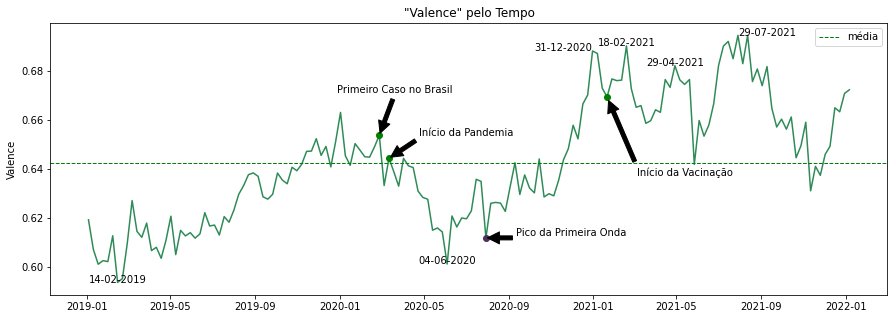

In [51]:
media = np.mean(valence_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Valence'], color='#2E8B57')

style = dict(size=10, color='black')

ax.text(dates[positions_valence[3]], valence_values[positions_valence[3]], "14-02-2019", ha='center', **style)
ax.text(dates[positions_valence[7]], valence_values[positions_valence[7]], "04-06-2020", ha='center', **style)
ax.text(dates[positions_valence[8]], valence_values[positions_valence[8]], "31-12-2020", ha='right', **style)
ax.text(dates[positions_valence[10]], valence_values[positions_valence[10]], "18-02-2021", ha='center', **style)
ax.text(dates[positions_valence[11]], valence_values[positions_valence[11]], "29-04-2021", ha='center', **style)
ax.text(dates[positions_valence[16]], valence_values[positions_valence[16]], "29-07-2021", ha='left', **style)

ax.plot(dates[60], valence_values[60], 'o', color='g')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[60], valence_values[60]), xycoords='data',
            xytext=(15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[62], valence_values[62], 'o', color='g')
ax.annotate('Início da Pandemia',
            xy=(dates[62], valence_values[62]), xycoords='data',
            xytext=(30, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[107], valence_values[107], 'o', color='g')
ax.annotate('Início da Vacinação',
            xy=(dates[107], valence_values[107]), xycoords='data',
            xytext=(30, -70), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[82], valence_values[82], 'o', color='#4F335B')
ax.annotate('Pico da Primeira Onda',
            xy=(dates[82], valence_values[82]), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Valence" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Valence')


## Energy

Text(0, 0.5, 'Energy')

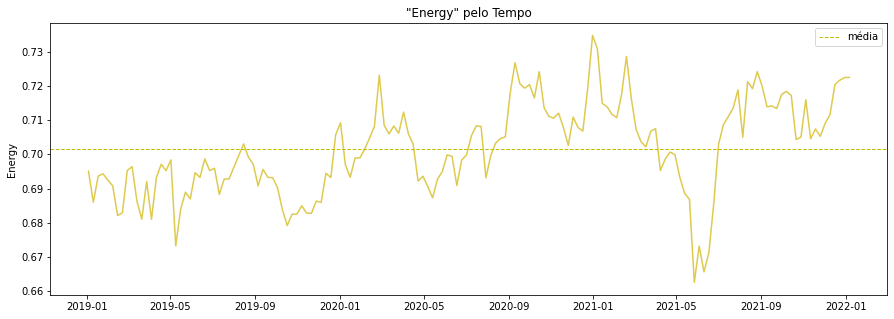

In [101]:
media = np.mean(energy_values)

plt.figure(figsize=(15,5))
plt.plot(dates, df['Energy'], color='#DECA4D')
plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

plt.title('"Energy" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Energy')

In [52]:
positions = []

for idx, x in enumerate(energy_values):
    if x < 0.675 or x > 0.725:
        positions.append(idx)
positions

[18, 88, 104, 105, 111, 125, 126, 127, 128]

In [53]:
dates_energy = []
for x in positions:
    dates_energy.append(dates[x])
dates_energy

[Timestamp('2019-05-09 00:00:00'),
 Timestamp('2020-09-10 00:00:00'),
 Timestamp('2020-12-31 00:00:00'),
 Timestamp('2021-01-07 00:00:00'),
 Timestamp('2021-02-18 00:00:00'),
 Timestamp('2021-05-27 00:00:00'),
 Timestamp('2021-06-03 00:00:00'),
 Timestamp('2021-06-10 00:00:00'),
 Timestamp('2021-06-17 00:00:00')]

In [223]:
n_paa_segments = 17
paa = PiecewiseAggregateApproximation(n_segments = n_paa_segments)
paa_dataset = paa.fit_transform([energy_values])
paa_dataset_inv = paa.inverse_transform(paa_dataset)
paa_dataset_inv = np.reshape(paa_dataset_inv, (158))
paa_dataset_inv

/home/bruna/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([0.69027444, 0.69027444, 0.69027444, 0.69027444, 0.69027444,
       0.69027444, 0.69027444, 0.69027444, 0.69027444, 0.69117333,
       0.69117333, 0.69117333, 0.69117333, 0.69117333, 0.69117333,
       0.69117333, 0.69117333, 0.69117333, 0.69007039, 0.69007039,
       0.69007039, 0.69007039, 0.69007039, 0.69007039, 0.69007039,
       0.69007039, 0.69007039, 0.69552889, 0.69552889, 0.69552889,
       0.69552889, 0.69552889, 0.69552889, 0.69552889, 0.69552889,
       0.69552889, 0.68725556, 0.68725556, 0.68725556, 0.68725556,
       0.68725556, 0.68725556, 0.68725556, 0.68725556, 0.68725556,
       0.69303722, 0.69303722, 0.69303722, 0.69303722, 0.69303722,
       0.69303722, 0.69303722, 0.69303722, 0.69303722, 0.7048    ,
       0.7048    , 0.7048    , 0.7048    , 0.7048    , 0.7048    ,
       0.7048    , 0.7048    , 0.7048    , 0.69991611, 0.69991611,
       0.69991611, 0.69991611, 0.69991611, 0.69991611, 0.69991611,
       0.69991611, 0.69991611, 0.69884584, 0.69884584, 0.69884

In [224]:
for x in range(len(paa_dataset_inv)):
    if paa_dataset_inv[x] == 0.:
        paa_dataset_inv[x] = 0.70966667

Text(0, 0.5, 'Energy')

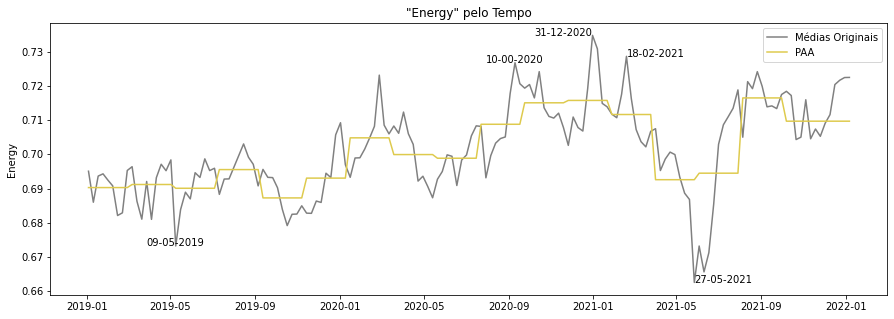

In [226]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Energy'], color='grey', label='Médias Originais')
plt.plot(dates, paa_dataset_inv, color='#DECA4D', label='PAA')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], energy_values[positions[0]], "09-05-2019", ha='center', **style)
ax.text(dates[positions[1]], energy_values[positions[1]], "10-00-2020", ha='center', **style)
ax.text(dates[positions[2]], energy_values[positions[2]], "31-12-2020", ha='right', **style)
ax.text(dates[positions[4]], energy_values[positions[4]], "18-02-2021", ha='left', **style)
ax.text(dates[positions[5]], energy_values[positions[5]], "27-05-2021", ha='left', **style)

plt.title('"Energy" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Energy')

Text(0, 0.5, 'Energy')

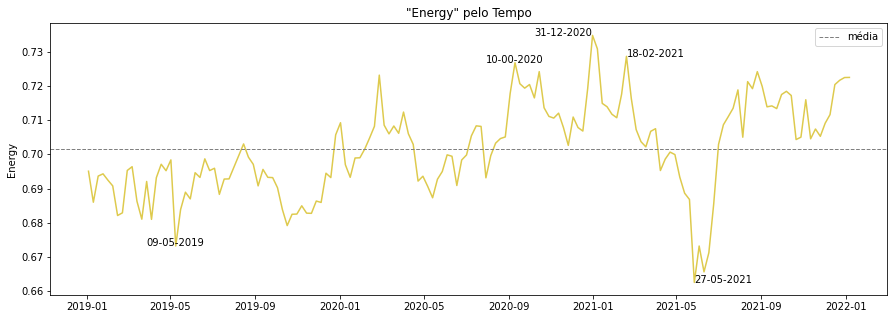

In [227]:
media = np.mean(energy_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Energy'], color='#DECA4D')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], energy_values[positions[0]], "09-05-2019", ha='center', **style)
ax.text(dates[positions[1]], energy_values[positions[1]], "10-00-2020", ha='center', **style)
ax.text(dates[positions[2]], energy_values[positions[2]], "31-12-2020", ha='right', **style)
ax.text(dates[positions[4]], energy_values[positions[4]], "18-02-2021", ha='left', **style)
ax.text(dates[positions[5]], energy_values[positions[5]], "27-05-2021", ha='left', **style)


plt.axhline(media,linewidth=1, color='grey', linestyle='--', label='média')

plt.title('"Energy" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Energy')


Text(0, 0.5, 'Energy')

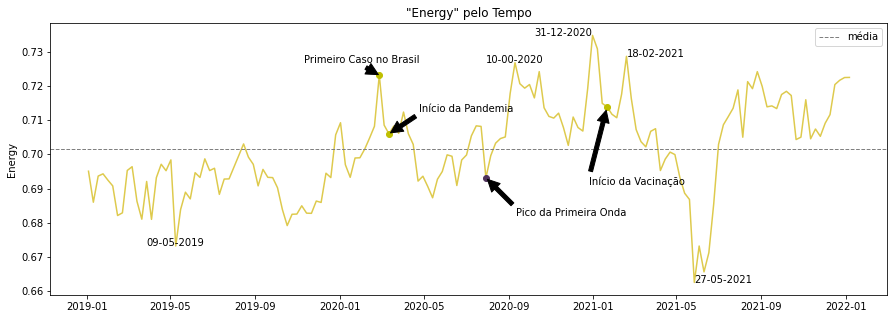

In [56]:
media = np.mean(energy_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Energy'], color='#DECA4D')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], energy_values[positions[0]], "09-05-2019", ha='center', **style)
ax.text(dates[positions[1]], energy_values[positions[1]], "10-00-2020", ha='center', **style)
ax.text(dates[positions[2]], energy_values[positions[2]], "31-12-2020", ha='right', **style)
ax.text(dates[positions[4]], energy_values[positions[4]], "18-02-2021", ha='left', **style)
ax.text(dates[positions[5]], energy_values[positions[5]], "27-05-2021", ha='left', **style)

ax.plot(dates[60], energy_values[60], 'o', color='y')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[60], energy_values[60]), xycoords='data',
            xytext=(40, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[62], energy_values[62], 'o', color='y')
ax.annotate('Início da Pandemia',
            xy=(dates[62], energy_values[62]), xycoords='data',
            xytext=(30, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[107], energy_values[107], 'o', color='y')
ax.annotate('Início da Vacinação',
            xy=(dates[107], energy_values[107]), xycoords='data',
            xytext=(30, -70), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[82], energy_values[82], 'o', color='#4F335B')
ax.annotate('Pico da Primeira Onda',
            xy=(dates[82], energy_values[82]), xycoords='data',
            xytext=(30, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

plt.axhline(media,linewidth=1, color='grey', linestyle='--', label='média')

plt.title('"Energy" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Energy')


# Tempo

Text(0, 0.5, 'Tempo')

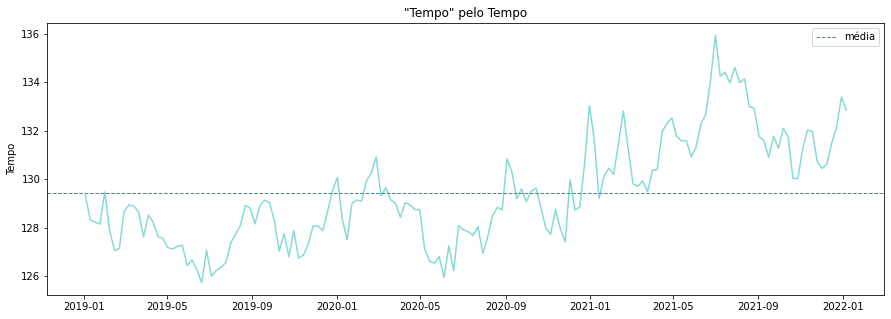

In [112]:
media = np.mean(tempo_values)

plt.figure(figsize=(15,5))
plt.plot(dates, df['Tempo'], color='#86DAD6')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

plt.title('"Tempo" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Tempo')

In [57]:
positions = []

for idx, x in enumerate(tempo_values):
    if x < 126.2 or x > 134:
        positions.append(idx)
positions

[24, 26, 74, 129, 130, 131, 132, 134, 136]

In [58]:
dates_tempo = []
for x in positions:
    dates_tempo.append(dates[x])
dates_tempo

[Timestamp('2019-06-20 00:00:00'),
 Timestamp('2019-07-04 00:00:00'),
 Timestamp('2020-06-04 00:00:00'),
 Timestamp('2021-06-24 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-07-08 00:00:00'),
 Timestamp('2021-07-15 00:00:00'),
 Timestamp('2021-07-29 00:00:00'),
 Timestamp('2021-08-12 00:00:00')]

In [230]:
n_paa_segments = 17
paa = PiecewiseAggregateApproximation(n_segments = n_paa_segments)
paa_dataset = paa.fit_transform([tempo_values])
paa_dataset_inv = paa.inverse_transform(paa_dataset)
paa_dataset_inv = np.reshape(paa_dataset_inv, (158))
paa_dataset_inv

/home/bruna/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([128.25645333, 128.25645333, 128.25645333, 128.25645333,
       128.25645333, 128.25645333, 128.25645333, 128.25645333,
       128.25645333, 128.13656   , 128.13656   , 128.13656   ,
       128.13656   , 128.13656   , 128.13656   , 128.13656   ,
       128.13656   , 128.13656   , 126.64933722, 126.64933722,
       126.64933722, 126.64933722, 126.64933722, 126.64933722,
       126.64933722, 126.64933722, 126.64933722, 127.58490056,
       127.58490056, 127.58490056, 127.58490056, 127.58490056,
       127.58490056, 127.58490056, 127.58490056, 127.58490056,
       127.95275444, 127.95275444, 127.95275444, 127.95275444,
       127.95275444, 127.95275444, 127.95275444, 127.95275444,
       127.95275444, 128.32188833, 128.32188833, 128.32188833,
       128.32188833, 128.32188833, 128.32188833, 128.32188833,
       128.32188833, 128.32188833, 129.42711889, 129.42711889,
       129.42711889, 129.42711889, 129.42711889, 129.42711889,
       129.42711889, 129.42711889, 129.42711889, 128.42

In [231]:
for x in range(len(paa_dataset_inv)):
    if paa_dataset_inv[x] == 0.:
        paa_dataset_inv[x] = 131.14758222

Text(0, 0.5, 'Tempo')

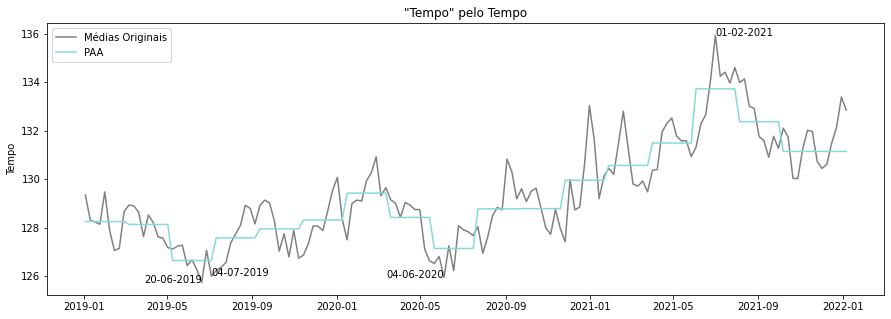

In [234]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Tempo'], color='grey', label='Médias Originais')
plt.plot(dates, paa_dataset_inv, color='#86DAD6', label='PAA')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], tempo_values[positions[0]], "20-06-2019", ha='right', **style)
ax.text(dates[positions[1]], tempo_values[positions[1]], "04-07-2019", ha='left', **style)
ax.text(dates[positions[2]], tempo_values[positions[2]], "04-06-2020", ha='right', **style)
ax.text(dates[positions[4]], tempo_values[positions[4]], "01-02-2021", ha='left', **style)

plt.title('"Tempo" pelo Tempo')
plt.legend(loc="upper left")
plt.ylabel('Tempo')

Text(0, 0.5, 'Tempo')

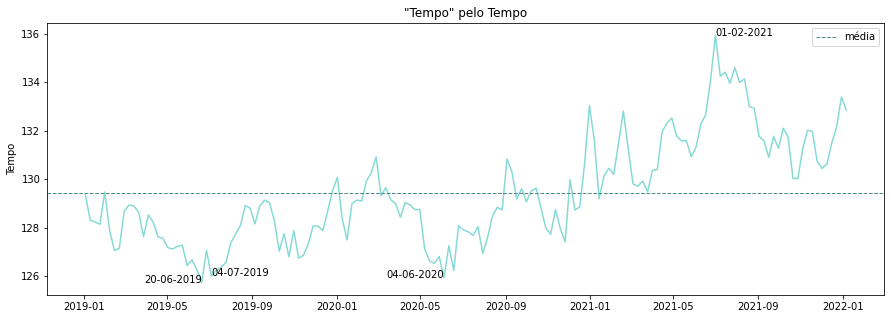

In [121]:
media = np.mean(tempo_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Tempo'], color='#86DAD6')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.text(dates[positions[0]], tempo_values[positions[0]], "20-06-2019", ha='right', **style)
ax.text(dates[positions[1]], tempo_values[positions[1]], "04-07-2019", ha='left', **style)
ax.text(dates[positions[2]], tempo_values[positions[2]], "04-06-2020", ha='right', **style)
ax.text(dates[positions[4]], tempo_values[positions[4]], "01-02-2021", ha='left', **style)

plt.title('"Tempo" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Tempo')

Text(0, 0.5, 'Tempo')

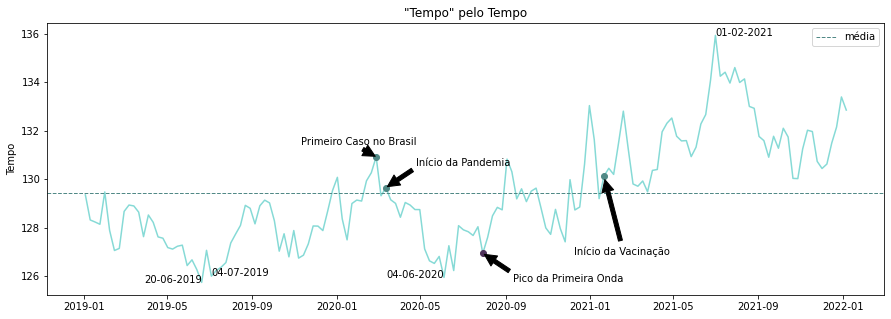

In [61]:
media = np.mean(tempo_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['Tempo'], color='#86DAD6')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.text(dates[positions[0]], tempo_values[positions[0]], "20-06-2019", ha='right', **style)
ax.text(dates[positions[1]], tempo_values[positions[1]], "04-07-2019", ha='left', **style)
ax.text(dates[positions[2]], tempo_values[positions[2]], "04-06-2020", ha='right', **style)
ax.text(dates[positions[4]], tempo_values[positions[4]], "01-02-2021", ha='left', **style)

ax.plot(dates[60], tempo_values[60], 'o', color='#518986')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[60], tempo_values[60]), xycoords='data',
            xytext=(40, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[62], tempo_values[62], 'o', color='#518986')
ax.annotate('Início da Pandemia',
            xy=(dates[62], tempo_values[62]), xycoords='data',
            xytext=(30, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[107], tempo_values[107], 'o', color='#518986')
ax.annotate('Início da Vacinação',
            xy=(dates[107], tempo_values[107]), xycoords='data',
            xytext=(-30, -70), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[82], tempo_values[82], 'o', color='#4F335B')
ax.annotate('Pico da Primeira Onda',
            xy=(dates[82], tempo_values[82]), xycoords='data',
            xytext=(30, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

plt.title('"Tempo" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Tempo')


# Medians

## Danceability

Text(0, 0.5, 'Danceability')

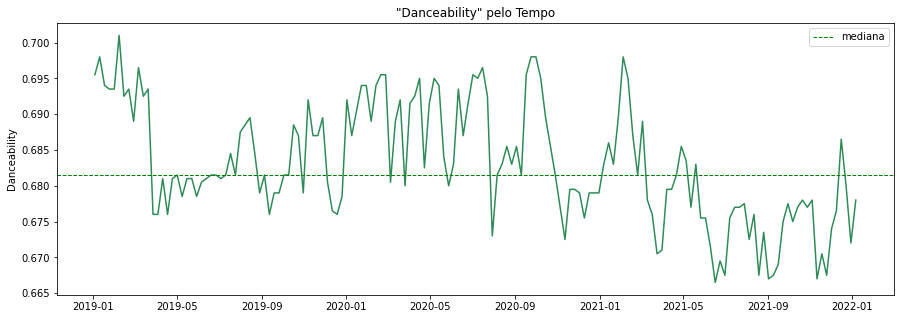

In [16]:
median = np.median(danceability_median)

plt.figure(figsize=(15,5))
plt.plot(dates, df['DanceabilityMedian'], color='#2E8B57')
plt.axhline(median,linewidth=1, color='g', linestyle='--', label='mediana')

plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

In [158]:
positions = []

for idx, x in enumerate(danceability_median):
    if x < 0.670 or x > 0.6965:
        positions.append(idx)
positions

[1, 5, 90, 91, 109, 128, 129, 130, 137, 139, 140, 141, 149, 151]

In [33]:
dates_tempo = []
for x in positions:
    dates_tempo.append(dates[x])
dates_tempo

[Timestamp('2019-01-10 00:00:00'),
 Timestamp('2019-02-07 00:00:00'),
 Timestamp('2020-09-24 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2021-02-04 00:00:00'),
 Timestamp('2021-06-17 00:00:00'),
 Timestamp('2021-06-24 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-19 00:00:00'),
 Timestamp('2021-09-02 00:00:00'),
 Timestamp('2021-09-09 00:00:00'),
 Timestamp('2021-09-16 00:00:00'),
 Timestamp('2021-11-11 00:00:00'),
 Timestamp('2021-11-25 00:00:00')]

In [159]:
n_paa_segments = 17
paa = PiecewiseAggregateApproximation(n_segments = n_paa_segments)
paa_dataset = paa.fit_transform([danceability_median])
paa_dataset_inv = paa.inverse_transform(paa_dataset)
paa_dataset_inv = np.reshape(paa_dataset_inv, (158))
paa_dataset_inv

/home/bruna/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([0.6945    , 0.6945    , 0.6945    , 0.6945    , 0.6945    ,
       0.6945    , 0.6945    , 0.6945    , 0.6945    , 0.68377778,
       0.68377778, 0.68377778, 0.68377778, 0.68377778, 0.68377778,
       0.68377778, 0.68377778, 0.68377778, 0.6805    , 0.6805    ,
       0.6805    , 0.6805    , 0.6805    , 0.6805    , 0.6805    ,
       0.6805    , 0.6805    , 0.68422222, 0.68422222, 0.68422222,
       0.68422222, 0.68422222, 0.68422222, 0.68422222, 0.68422222,
       0.68422222, 0.68261111, 0.68261111, 0.68261111, 0.68261111,
       0.68261111, 0.68261111, 0.68261111, 0.68261111, 0.68261111,
       0.68377778, 0.68377778, 0.68377778, 0.68377778, 0.68377778,
       0.68377778, 0.68377778, 0.68377778, 0.68377778, 0.69133333,
       0.69133333, 0.69133333, 0.69133333, 0.69133333, 0.69133333,
       0.69133333, 0.69133333, 0.69133333, 0.69044444, 0.69044444,
       0.69044444, 0.69044444, 0.69044444, 0.69044444, 0.69044444,
       0.69044444, 0.69044444, 0.68955556, 0.68955556, 0.68955

In [160]:
for x in range(len(paa_dataset_inv)):
    if paa_dataset_inv[x] == 0.:
        paa_dataset_inv[x] = 0.67377778

Text(0, 0.5, 'Danceability')

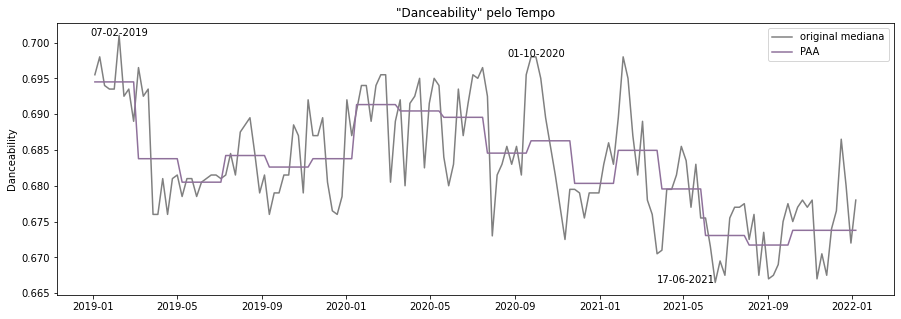

In [161]:
mediana = np.median(danceability_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['DanceabilityMedian'], color='grey', label='original mediana')
plt.plot(dates, paa_dataset_inv, color="#8F719b", label='PAA')

style = dict(size=10, color='black')

ax.text(dates[positions[1]], danceability_median[positions[1]], "07-02-2019", ha='center', **style)
ax.text(dates[positions[3]], danceability_median[positions[3]], "01-10-2020", ha='center', **style)
ax.text(dates[positions[5]], danceability_median[positions[5]], "17-06-2021", ha='right', **style)


plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

Text(0, 0.5, 'Danceability')

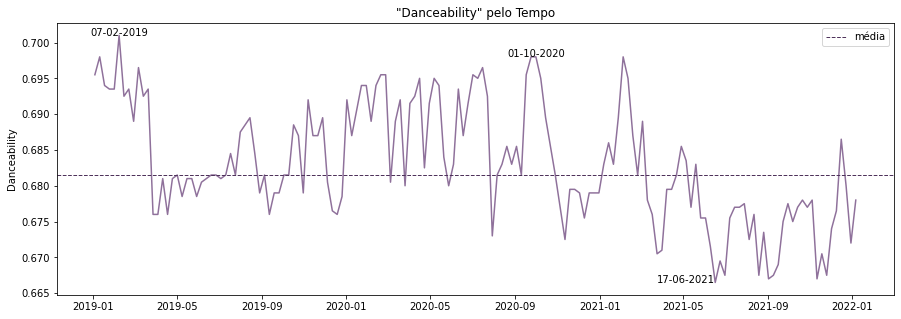

In [45]:
mediana = np.median(danceability_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['DanceabilityMedian'], color='#8F719B')

style = dict(size=10, color='black')

ax.text(dates[positions[1]], danceability_median[positions[1]], "07-02-2019", ha='center', **style)
ax.text(dates[positions[3]], danceability_median[positions[3]], "01-10-2020", ha='center', **style)
ax.text(dates[positions[5]], danceability_median[positions[5]], "17-06-2021", ha='right', **style)
plt.axhline(mediana,linewidth=1, color='#4F335B', linestyle='--', label='média')


plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

## Valence

Text(0, 0.5, 'Valence')

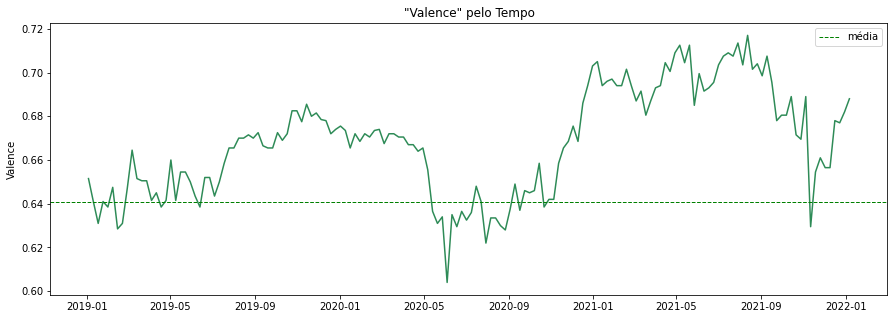

In [148]:
median = np.median(valence_values)

plt.figure(figsize=(15,5))
plt.plot(dates, df['ValenceMedian'], color='#2E8B57')
plt.axhline(median,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Valence" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Valence')

In [176]:
positions = []

for idx, x in enumerate(valence_median):
    if x < 0.62 or x > 0.71:
        positions.append(idx)
positions

[74, 122, 124, 134, 136]

In [177]:
dates_tempo = []
for x in positions:
    dates_tempo.append(dates[x])
dates_tempo

[Timestamp('2020-06-04 00:00:00'),
 Timestamp('2021-05-06 00:00:00'),
 Timestamp('2021-05-20 00:00:00'),
 Timestamp('2021-07-29 00:00:00'),
 Timestamp('2021-08-12 00:00:00')]

In [178]:
n_paa_segments = 17
paa = PiecewiseAggregateApproximation(n_segments = n_paa_segments)
paa_dataset = paa.fit_transform([valence_median])
paa_dataset_inv = paa.inverse_transform(paa_dataset)
paa_dataset_inv = np.reshape(paa_dataset_inv, (158))
paa_dataset_inv

/home/bruna/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([0.63966667, 0.63966667, 0.63966667, 0.63966667, 0.63966667,
       0.63966667, 0.63966667, 0.63966667, 0.63966667, 0.64927778,
       0.64927778, 0.64927778, 0.64927778, 0.64927778, 0.64927778,
       0.64927778, 0.64927778, 0.64927778, 0.64777778, 0.64777778,
       0.64777778, 0.64777778, 0.64777778, 0.64777778, 0.64777778,
       0.64777778, 0.64777778, 0.66594444, 0.66594444, 0.66594444,
       0.66594444, 0.66594444, 0.66594444, 0.66594444, 0.66594444,
       0.66594444, 0.67261111, 0.67261111, 0.67261111, 0.67261111,
       0.67261111, 0.67261111, 0.67261111, 0.67261111, 0.67261111,
       0.67761111, 0.67761111, 0.67761111, 0.67761111, 0.67761111,
       0.67761111, 0.67761111, 0.67761111, 0.67761111, 0.67061111,
       0.67061111, 0.67061111, 0.67061111, 0.67061111, 0.67061111,
       0.67061111, 0.67061111, 0.67061111, 0.66316667, 0.66316667,
       0.66316667, 0.66316667, 0.66316667, 0.66316667, 0.66316667,
       0.66316667, 0.66316667, 0.63183333, 0.63183333, 0.63183

In [179]:
for x in range(len(paa_dataset_inv)):
    if paa_dataset_inv[x] == 0.:
        paa_dataset_inv[x] = 0.66677778

Text(0, 0.5, 'Valence')

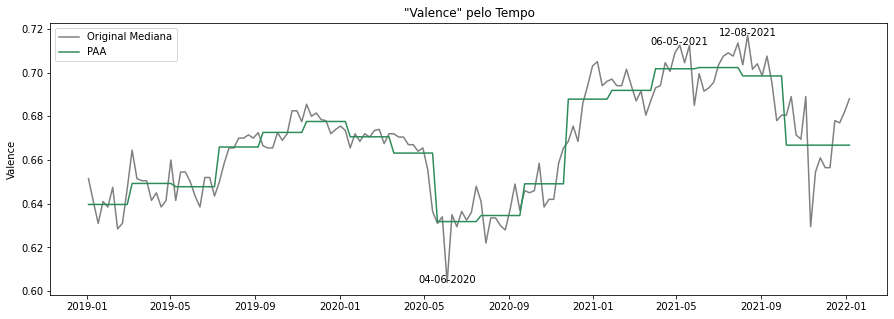

In [180]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['ValenceMedian'], color='grey', label='Original Mediana')
plt.plot(dates, paa_dataset_inv, color="#2E8B57", label='PAA')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], valence_median[positions[0]], "04-06-2020", ha='center', **style)
ax.text(dates[positions[1]], valence_median[positions[1]], "06-05-2021", ha='center', **style)
ax.text(dates[positions[4]], valence_median[positions[4]], "12-08-2021", ha='center', **style)


plt.title('"Valence" pelo Tempo')
plt.legend(loc="upper left")
plt.ylabel('Valence')

Text(0, 0.5, 'Valence')

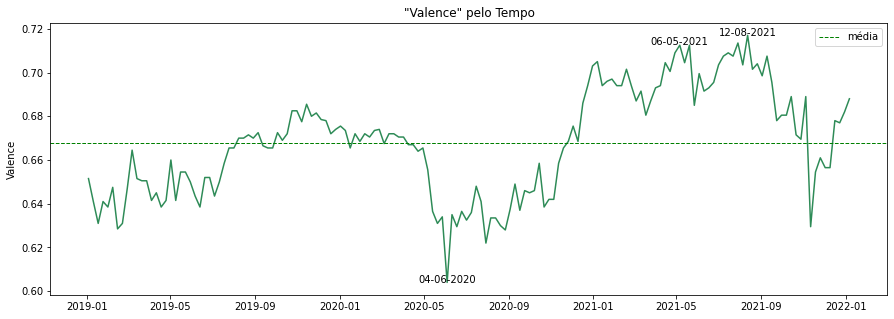

In [182]:
median = np.mean(valence_median)
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['ValenceMedian'], color='#2E8B57')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], valence_median[positions[0]], "04-06-2020", ha='center', **style)
ax.text(dates[positions[1]], valence_median[positions[1]], "06-05-2021", ha='center', **style)
ax.text(dates[positions[4]], valence_median[positions[4]], "12-08-2021", ha='center', **style)
plt.axhline(median,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Valence" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Valence')

## Energy

Text(0, 0.5, 'Energy')

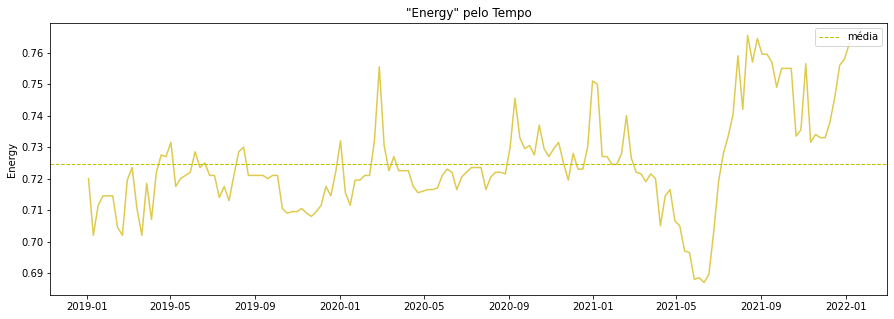

In [168]:
media = np.mean(energy_median)

plt.figure(figsize=(15,5))
plt.plot(dates, df['EnergyMedian'], color='#DECA4D')
plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

plt.title('"Energy" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Energy')

In [183]:
positions = []

for idx, x in enumerate(energy_median):
    if x < 0.695 or x > 0.751:
        positions.append(idx)
positions

[60,
 125,
 126,
 127,
 128,
 134,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145,
 148,
 155,
 156,
 157]

In [184]:
dates_tempo = []
for x in positions:
    dates_tempo.append(dates[x])
dates_tempo

[Timestamp('2020-02-27 00:00:00'),
 Timestamp('2021-05-27 00:00:00'),
 Timestamp('2021-06-03 00:00:00'),
 Timestamp('2021-06-10 00:00:00'),
 Timestamp('2021-06-17 00:00:00'),
 Timestamp('2021-07-29 00:00:00'),
 Timestamp('2021-08-12 00:00:00'),
 Timestamp('2021-08-19 00:00:00'),
 Timestamp('2021-08-26 00:00:00'),
 Timestamp('2021-09-02 00:00:00'),
 Timestamp('2021-09-09 00:00:00'),
 Timestamp('2021-09-16 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-14 00:00:00'),
 Timestamp('2021-11-04 00:00:00'),
 Timestamp('2021-12-23 00:00:00'),
 Timestamp('2021-12-30 00:00:00'),
 Timestamp('2022-01-06 00:00:00')]

In [185]:
n_paa_segments = 17
paa = PiecewiseAggregateApproximation(n_segments = n_paa_segments)
paa_dataset = paa.fit_transform([energy_median])
paa_dataset_inv = paa.inverse_transform(paa_dataset)
paa_dataset_inv = np.reshape(paa_dataset_inv, (158))
paa_dataset_inv

/home/bruna/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([0.71144444, 0.71144444, 0.71144444, 0.71144444, 0.71144444,
       0.71144444, 0.71144444, 0.71144444, 0.71144444, 0.71883333,
       0.71883333, 0.71883333, 0.71883333, 0.71883333, 0.71883333,
       0.71883333, 0.71883333, 0.71883333, 0.72216667, 0.72216667,
       0.72216667, 0.72216667, 0.72216667, 0.72216667, 0.72216667,
       0.72216667, 0.72216667, 0.72077778, 0.72077778, 0.72077778,
       0.72077778, 0.72077778, 0.72077778, 0.72077778, 0.72077778,
       0.72077778, 0.71466667, 0.71466667, 0.71466667, 0.71466667,
       0.71466667, 0.71466667, 0.71466667, 0.71466667, 0.71466667,
       0.7155    , 0.7155    , 0.7155    , 0.7155    , 0.7155    ,
       0.7155    , 0.7155    , 0.7155    , 0.7155    , 0.72588889,
       0.72588889, 0.72588889, 0.72588889, 0.72588889, 0.72588889,
       0.72588889, 0.72588889, 0.72588889, 0.71961111, 0.71961111,
       0.71961111, 0.71961111, 0.71961111, 0.71961111, 0.71961111,
       0.71961111, 0.71961111, 0.721     , 0.721     , 0.721  

In [186]:
for x in range(len(paa_dataset_inv)):
    if paa_dataset_inv[x] == 0.:
        paa_dataset_inv[x] = 0.74077778

Text(0, 0.5, 'Energy')

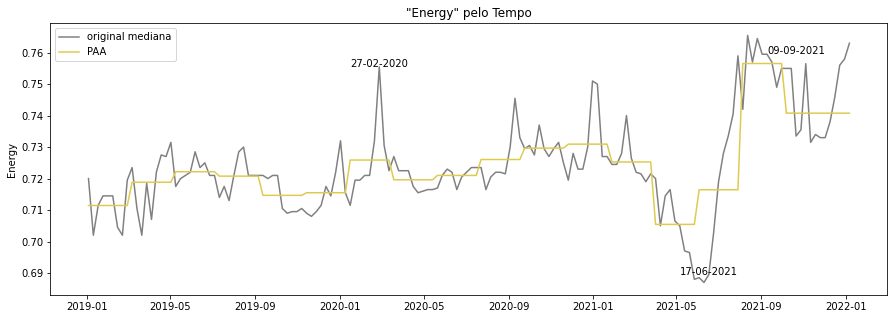

In [191]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['EnergyMedian'], color='grey', label='original mediana')
plt.plot(dates, paa_dataset_inv, color="#DECA4D", label='PAA')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], energy_median[positions[0]], "27-02-2020", ha='center', **style)
ax.text(dates[positions[4]], energy_median[positions[4]], "17-06-2021", ha='center', **style)
ax.text(dates[positions[10]], energy_median[positions[10]], "09-09-2021", ha='left', **style)

plt.title('"Energy" pelo Tempo')
plt.legend(loc="upper left")
plt.ylabel('Energy')

Text(0, 0.5, 'Energy')

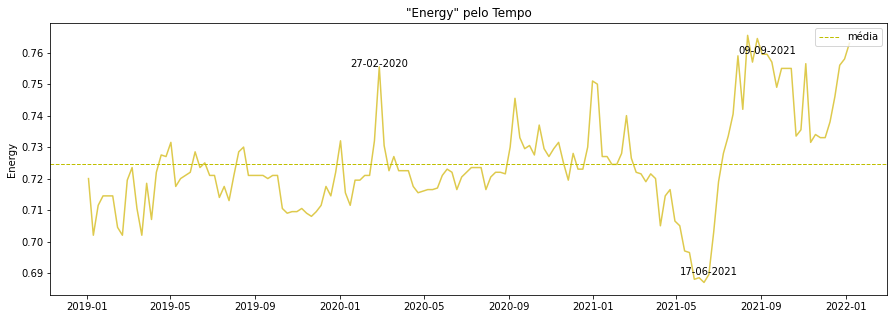

In [68]:
media = np.mean(energy_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['EnergyMedian'], color='#DECA4D')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], energy_median[positions[0]], "27-02-2020", ha='center', **style)
ax.text(dates[positions[4]], energy_median[positions[4]], "17-06-2021", ha='center', **style)
ax.text(dates[positions[10]], energy_median[positions[10]], "09-09-2021", ha='center', **style)


plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

plt.title('"Energy" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Energy')

## Tempo

Text(0, 0.5, 'Tempo')

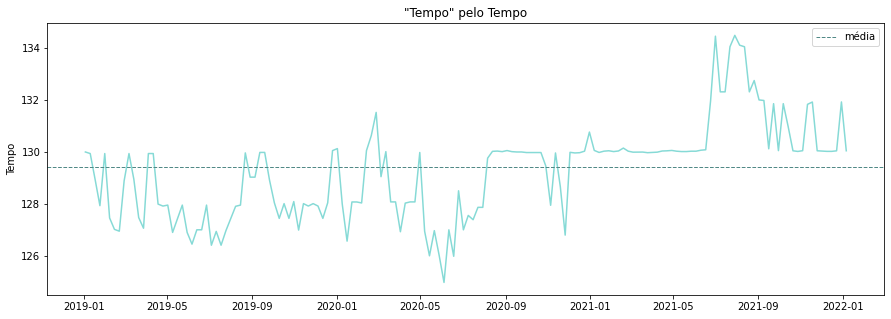

In [69]:
media = np.mean(tempo_values)

plt.figure(figsize=(15,5))
plt.plot(dates, df['TempoMedian'], color='#86DAD6')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

plt.title('"Tempo" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Tempo')

In [192]:
positions = []

for idx, x in enumerate(tempo_median):
    if x < 126 or x > 134:
        positions.append(idx)
positions

[74, 76, 130, 133, 134, 135, 136]

In [193]:
dates_tempo = []
for x in positions:
    dates_tempo.append(dates[x])
dates_tempo

[Timestamp('2020-06-04 00:00:00'),
 Timestamp('2020-06-18 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-07-22 00:00:00'),
 Timestamp('2021-07-29 00:00:00'),
 Timestamp('2021-08-05 00:00:00'),
 Timestamp('2021-08-12 00:00:00')]

In [194]:
n_paa_segments = 17
paa = PiecewiseAggregateApproximation(n_segments = n_paa_segments)
paa_dataset = paa.fit_transform([tempo_median])
paa_dataset_inv = paa.inverse_transform(paa_dataset)
paa_dataset_inv = np.reshape(paa_dataset_inv, (158))
paa_dataset_inv

/home/bruna/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([128.56594444, 128.56594444, 128.56594444, 128.56594444,
       128.56594444, 128.56594444, 128.56594444, 128.56594444,
       128.56594444, 128.57577778, 128.57577778, 128.57577778,
       128.57577778, 128.57577778, 128.57577778, 128.57577778,
       128.57577778, 128.57577778, 127.11888889, 127.11888889,
       127.11888889, 127.11888889, 127.11888889, 127.11888889,
       127.11888889, 127.11888889, 127.11888889, 127.96433333,
       127.96433333, 127.96433333, 127.96433333, 127.96433333,
       127.96433333, 127.96433333, 127.96433333, 127.96433333,
       128.32372222, 128.32372222, 128.32372222, 128.32372222,
       128.32372222, 128.32372222, 128.32372222, 128.32372222,
       128.32372222, 128.39283333, 128.39283333, 128.39283333,
       128.39283333, 128.39283333, 128.39283333, 128.39283333,
       128.39283333, 128.39283333, 129.11283333, 129.11283333,
       129.11283333, 129.11283333, 129.11283333, 129.11283333,
       129.11283333, 129.11283333, 129.11283333, 127.80

In [195]:
for x in range(len(paa_dataset_inv)):
    if paa_dataset_inv[x] == 0.:
        paa_dataset_inv[x] = 130.74744444

Text(0, 0.5, 'Tempo')

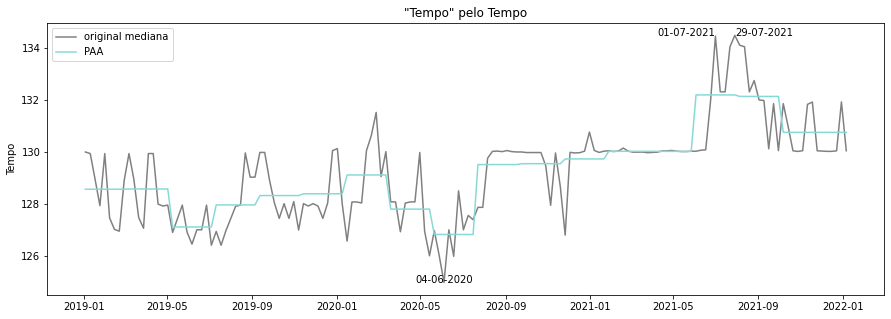

In [197]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['TempoMedian'], color='grey', label='original mediana')
plt.plot(dates, paa_dataset_inv, color="#86DAD6", label='PAA')

style = dict(size=10, color='black')

ax.text(dates[positions[0]], tempo_median[positions[0]], "04-06-2020", ha='center', **style)
ax.text(dates[positions[2]], tempo_median[positions[2]], "01-07-2021", ha='right', **style)
ax.text(dates[positions[4]], tempo_median[positions[4]], "29-07-2021", ha='left', **style)

plt.title('"Tempo" pelo Tempo')
plt.legend(loc="upper left")
plt.ylabel('Tempo')

Text(0, 0.5, 'Tempo')

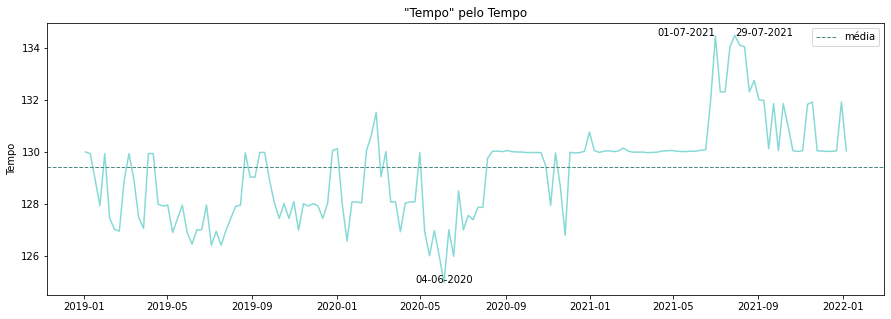

In [73]:
media = np.mean(tempo_values)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, df['TempoMedian'], color='#86DAD6')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.text(dates[positions[0]], tempo_median[positions[0]], "04-06-2020", ha='center', **style)
ax.text(dates[positions[2]], tempo_median[positions[2]], "01-07-2021", ha='right', **style)
ax.text(dates[positions[4]], tempo_median[positions[4]], "29-07-2021", ha='left', **style)

plt.title('"Tempo" pelo Tempo')
plt.legend(loc="upper right")
plt.ylabel('Tempo')